# Klastrowanie

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from sklearn import datasets

## Narysujmy iris data

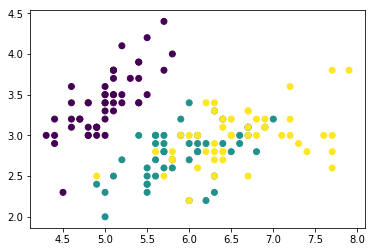

In [26]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [27]:
from sklearn.cluster import KMeans 
model = KMeans(n_clusters=3,n_jobs=5)
model.fit(X)
labels = model.predict(X)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


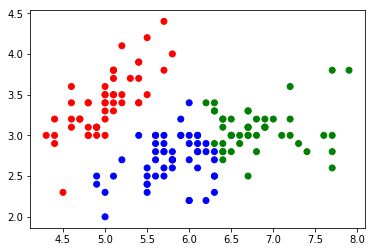

In [28]:
plt.scatter(X[:,0],X[:,1],c=np.array(["red","green","blue"])[np.array(labels)])
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
print("Dokładność modelu wytrenowanego to: ",100*accuracy_score(y,labels), "%")

Dokładność modelu wytrenowanego to:  51.3333333333 %


# Rozważmy nasze dane z pisanych liter

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

# Możemy narysować środku klastrów

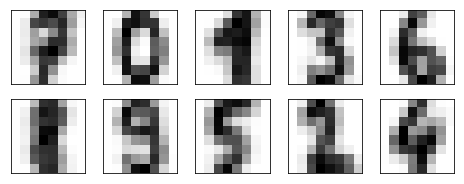

In [33]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()

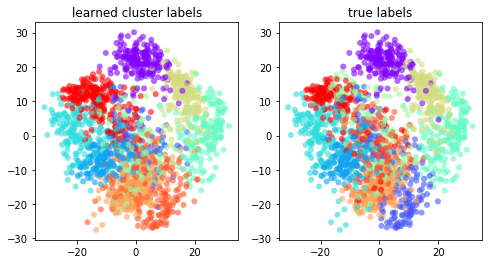

In [34]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');
plt.show()

In [35]:
from sklearn.metrics import accuracy_score
print("Dokładność modelu wytrenowanego to: ",100*accuracy_score(digits.target, labels), "%")

Dokładność modelu wytrenowanego to:  79.6883695047 %


**80% – not bad!** Let's check-out the confusion matrix for this:

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 152   8   0   0   0   3   8   3]
 [  0   0   1 154   0   2   0   7   7  12]
 [  0   5   0   0 164   0   0   8   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 176   3   0]
 [  0   6   3   4   0   4   2   5 102  48]
 [  0  20   0   6   0   6   0   7   2 139]]


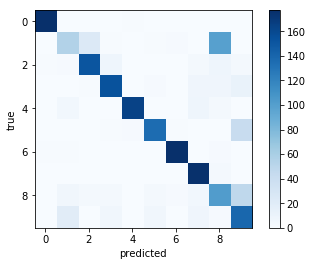

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');
plt.show()

# Example: KMeans for Color Compression

In [44]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))

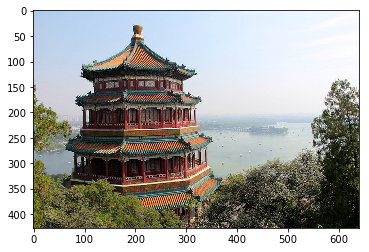

In [37]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);
plt.show()

In [38]:
china.shape

(427, 640, 3)

In [39]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


In [52]:
# reduce the size of the image for speed
image = china[::3, ::3]
n_colors = 20

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

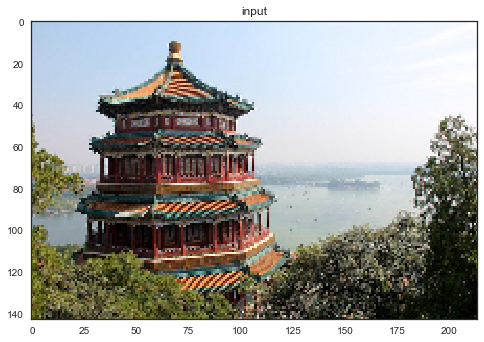

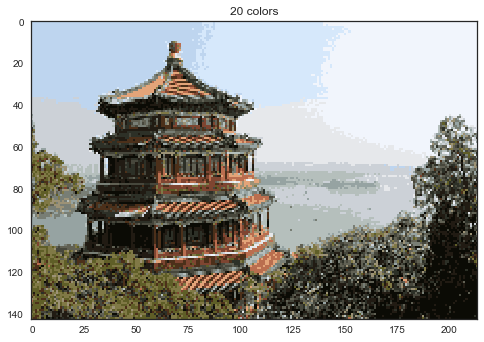

In [53]:
# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))
plt.show()